# Analiza zbioru danych dotyczących smartfonów

Projekt ten ma na celu przeprowadzenie analizy eksploracyjnej oraz wykonanie regresji liniowej na zbiorze danych dotyczących smartfonów.

Link do zbioru: https://www.kaggle.com/datasets/swahajraza/a-dataset-of-smartphone-specifications-and-prices

# Analiza zbioru

## Import bibliotek

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Wczytanie zbioru

In [57]:
df = pd.read_csv('smartphone_specifications_and_prices.csv')

df

,brand_name,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,334999.0
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,189999.0
2,SAMSUNG,Samsung Zero,"6.41"" (120Hz)",32 MP,12 MP + 8 MP + 12 MP,Snapdragon 888 5G,4500 mAh,8.0,256,112999.0
3,SAMSUNG,Samsung S24,"6.1"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,3700 mAh,8.0,128,249999.0
4,SAMSUNG,Samsung A05s,"6.5"" (90Hz)",5MP,50MP + 2MP + 2MP,Exynos,5000 mAh,4.0,64,24999.0
...,...,...,...,...,...,...,...,...,...,...
1251,OPPO,Oppo A37,"5.0""",5 MP,8 MP,Snapdragon 410,2630mAh,2.0,16,88415.0
1252,OPPO,Oppo F1,"5.0""",8 MP,13 MP,Snapdragon 616,-,3.0,16,35999.0
1253,OPPO,Oppo A31,"4.5""",5 MP,8 MP,Snapdragon 410,2000mAh,1.0,8,88415.0
1254,OPPO,Oppo Reno 4 SE,"6.43""",32 MP,48 MP + 8 MP + 2 MP,Dimensity 720,4300mAh,8.0,128,88415.0


## Podstawowe statystyki

In [58]:
# liczba obiektów
print("Liczba obiektów:", df.shape[0])
# liczba marek smartfonów
marki = df['brand_name'].unique()
print("Liczba marek:", marki.shape[0])
# liczba obiektów poszczególnych marek
for i in list(marki):
    print("Obiektów marki", i, ": ", len(df[df['brand_name'] == i]))
# liczba atrybutów
print("Liczba atrybutów:", df.shape[1])
# liczba braków
print("Ilość braków:", df.isnull().sum().sum())

Liczba obiektów: 1256
Liczba marek: 5
Obiektów marki SAMSUNG :  404
Obiektów marki XIAOMI :  393
Obiektów marki APPLE :  154
Obiektów marki ONEPLUS :  86
Obiektów marki OPPO :  219
Liczba atrybutów: 10
Ilość braków: 9


In [59]:
# sprawdzenie, w której kolumnie istnieją te braki
print(df.isnull().sum())

brand_name          0
model               0
display             0
front_camera        0
rare_camera         0
processor           9
battery_capacity    0
ram                 0
internal_storage    0
price               0
dtype: int64


Ze względu na wiedzę a-priori związaną z tematem kamer, można stwierdzić, że sama informacja o ilości Mega Pixeli (MP) nie stanowi wyznacznika jakości kamer, dlatego nie będę ich uwzględniał

In [60]:
df = df.drop(columns = ['front_camera', 'rare_camera'])

In [61]:
df = df.drop(df[(df['battery_capacity'].str.find('mAh') == -1) | (df['battery_capacity'].str.find('able') != -1)].index)

# obróbka wartości pojemności baterii
df['battery_capacity'] = pd.to_numeric(df['battery_capacity'].str[-8:-3])

print(df)

     brand_name                 model        display          processor  \
0       SAMSUNG     Samsung S24 Ultra   6.8" (120Hz)            Exynos    
1       SAMSUNG      Samsung S24 Plus   6.6" (120Hz)            Exynos    
2       SAMSUNG          Samsung Zero  6.41" (120Hz)  Snapdragon 888 5G   
3       SAMSUNG           Samsung S24   6.1" (120Hz)            Exynos    
4       SAMSUNG          Samsung A05s    6.5" (90Hz)            Exynos    
...         ...                   ...            ...                ...   
1250       OPPO              Oppo A57           5.2"     Snapdragon 435   
1251       OPPO              Oppo A37           5.0"     Snapdragon 410   
1253       OPPO              Oppo A31           4.5"     Snapdragon 410   
1254       OPPO        Oppo Reno 4 SE          6.43"      Dimensity 720   
1255       OPPO  Oppo Reno 4 SE 256GB          6.43"      Dimensity 720   

      battery_capacity  ram  internal_storage     price  
0                 5000  8.0              

In [62]:
df[['screen_size', 'refresh_rate']] = pd.DataFrame(df['display'].str.split('"').tolist(), index = df.index)
df = df.drop(columns = 'display')

df

,brand_name,model,processor,battery_capacity,ram,internal_storage,price,screen_size,refresh_rate
0,SAMSUNG,Samsung S24 Ultra,Exynos,5000,8.0,128,334999.0,6.8,(120Hz)
1,SAMSUNG,Samsung S24 Plus,Exynos,4500,8.0,128,189999.0,6.6,(120Hz)
2,SAMSUNG,Samsung Zero,Snapdragon 888 5G,4500,8.0,256,112999.0,6.41,(120Hz)
3,SAMSUNG,Samsung S24,Exynos,3700,8.0,128,249999.0,6.1,(120Hz)
4,SAMSUNG,Samsung A05s,Exynos,5000,4.0,64,24999.0,6.5,(90Hz)
...,...,...,...,...,...,...,...,...,...
1250,OPPO,Oppo A57,Snapdragon 435,2900,3.0,32,36999.0,5.2,
1251,OPPO,Oppo A37,Snapdragon 410,2630,2.0,16,88415.0,5.0,
1253,OPPO,Oppo A31,Snapdragon 410,2000,1.0,8,88415.0,4.5,
1254,OPPO,Oppo Reno 4 SE,Dimensity 720,4300,8.0,128,88415.0,6.43,


In [63]:
df['refresh_rate'] = df['refresh_rate'].apply(lambda x: '60' if x == ''  else x[2:-3])

print(df)

     brand_name                 model          processor  battery_capacity  \
0       SAMSUNG     Samsung S24 Ultra            Exynos               5000   
1       SAMSUNG      Samsung S24 Plus            Exynos               4500   
2       SAMSUNG          Samsung Zero  Snapdragon 888 5G              4500   
3       SAMSUNG           Samsung S24            Exynos               3700   
4       SAMSUNG          Samsung A05s            Exynos               5000   
...         ...                   ...                ...               ...   
1250       OPPO              Oppo A57     Snapdragon 435              2900   
1251       OPPO              Oppo A37     Snapdragon 410              2630   
1253       OPPO              Oppo A31     Snapdragon 410              2000   
1254       OPPO        Oppo Reno 4 SE      Dimensity 720              4300   
1255       OPPO  Oppo Reno 4 SE 256GB      Dimensity 720              4300   

      ram  internal_storage     price screen_size refresh_rate 

In [64]:
# liczba obiektów
print("Liczba obiektów:", df.shape[0])
# liczba marek smartfonów
marki = df['brand_name'].unique()
print("Liczba marek:", marki.shape[0])
# liczba obiektów poszczególnych marek
for i in list(marki):
    print("Obiektów marki", i, ": ", len(df[df['brand_name'] == i]))
# liczba atrybutów
print("Liczba atrybutów:", df.shape[1])
# liczba braków
print("Ilość braków:", df.isnull().sum().sum())

Liczba obiektów: 1225
Liczba marek: 5
Obiektów marki SAMSUNG :  395
Obiektów marki XIAOMI :  393
Obiektów marki APPLE :  137
Obiektów marki ONEPLUS :  85
Obiektów marki OPPO :  215
Liczba atrybutów: 9
Ilość braków: 9


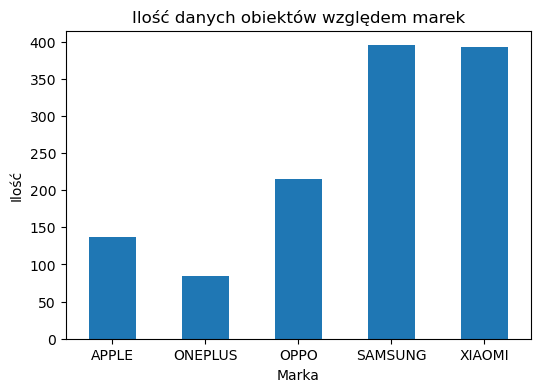

In [65]:
# wykres
plt.figure(figsize=(6, 4))
df['brand_name'].value_counts().sort_index().plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów względem marek', fontsize = 12)
plt.xlabel('Marka', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Zbiór posiada 5 producentów smartfonów oraz nie posiada braków. Większość obiektów (smartfonów) jest marki SAMSUNG lub XIAOMI. Jednocześnie każdy smartfon posiada 6 atrybutów ilościowych: pamięć wewnętrzną, pamięć RAM, wielkość przekątnej ekranu, odświeżanie ekranu, pojemność baterii i cenę

*odświeżanie ekranu może być potraktowane jako atrybut kategoryczny porządkowy, ponieważ wartości odświeżania ekranu zwykle przyjmują wartości 60, 90, 120 Hz

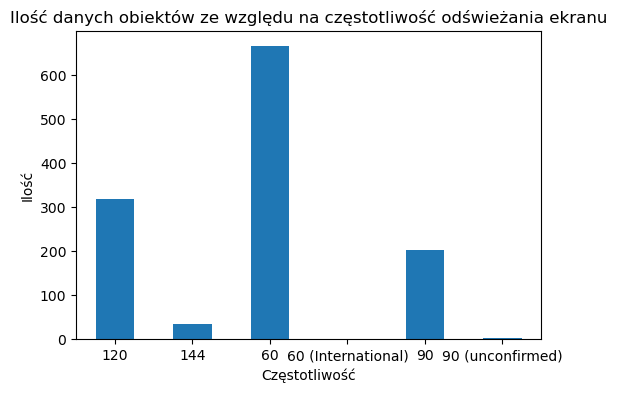

   brand_name              model    processor  battery_capacity  ram  \
7     SAMSUNG        Samsung M14      Exynos               5000  4.0   
56    SAMSUNG        Samsung M13  Exynos 850               5000  4.0   
57    SAMSUNG  Samsung M13 128GB  Exynos 850               5000  4.0   

    internal_storage    price screen_size      refresh_rate  
7                 64  34999.0         6.6  90 (unconfirmed)  
56                64  37999.0         6.6  90 (unconfirmed)  
57               128  41999.0         6.6  90 (unconfirmed)  


In [68]:
plt.figure(figsize=(6, 4))
df['refresh_rate'].value_counts().sort_index().plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów ze względu na częstotliwość odświeżania ekranu', fontsize = 12)
plt.xlabel('Częstotliwość', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

In [69]:
df['refresh_rate'] = df['refresh_rate'].apply(lambda x: x[:2] if '(' in x  else x)

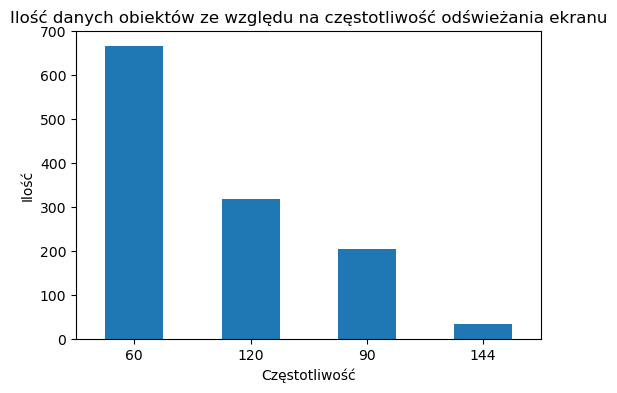

In [73]:
plt.figure(figsize=(6, 4))
df['refresh_rate'].value_counts().sort_values(ascending=0).plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów ze względu na częstotliwość odświeżania ekranu', fontsize = 12)
plt.xlabel('Częstotliwość', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()